In [7]:
%run prepare_data.ipynb
from math import exp
from random import seed
from random import random
import matplotlib.pyplot as plt

In [8]:
training_data = read_csv_int('vornamen_as_features')
test_data = read_csv_int('vornamen_test_data')

print(training_data[0])
print(test_data[0])

[0, 0, 0, 0, 1]
[0, 1, 0, 0, 0]


In [9]:
def initialize_network(n_inputs, n_hidden, n_outputs):
    network = list()
    hidden_layer = [{'weights':[random() for i in range(n_inputs + 1)]} for i in range(n_hidden)]
    network.append(hidden_layer)
    output_layer = [{'weights':[random() for i in range(n_hidden + 1)]} for i in range(n_outputs)]
    network.append(output_layer)
    return network

In [10]:
# Make a prediction with a network
def predict(network, row):
    outputs = forward_propagate(network, row)
    return outputs.index(max(outputs))

In [11]:
# Calculate neuron activation for an input
def activate(weights, inputs):
    activation = weights[-1]
    for i in range(len(weights)-1):
        activation += weights[i] * inputs[i]
    return activation

In [12]:
# Transfer neuron activation
def transfer(activation):
    return 1.0 / (1.0 + exp(-activation))

In [13]:
# Forward propagate input to a network output
def forward_propagate(network, row):
    inputs = row
    for layer in network:
        new_inputs = []
        for neuron in layer:
            activation = activate(neuron['weights'], inputs)
            neuron['output'] = transfer(activation)
            new_inputs.append(neuron['output'])
        inputs = new_inputs
    return inputs

In [14]:
# Calculate the derivative of an neuron output
def transfer_derivative(output):
    return output * (1.0 - output)

In [15]:
# Backpropagate error and store in neurons
def backward_propagate_error(network, expected):
    for i in reversed(range(len(network))):
        layer = network[i]
        errors = list()
        if i != len(network)-1:
            for j in range(len(layer)):
                error = 0.0
                for neuron in network[i + 1]:
                    error += (neuron['weights'][j] * neuron['delta'])
                errors.append(error)
        else:
            for j in range(len(layer)):
                neuron = layer[j]
                errors.append(expected[j] - neuron['output'])
        for j in range(len(layer)):
            neuron = layer[j]
            neuron['delta'] = errors[j] * transfer_derivative(neuron['output'])

In [16]:
# Update network weights with error
def update_weights(network, row, l_rate):
    for i in range(len(network)):
        inputs = row[:-1]
        if i != 0:
            inputs = [neuron['output'] for neuron in network[i - 1]]
        for neuron in network[i]:
            for j in range(len(inputs)):
                neuron['weights'][j] += l_rate * neuron['delta'] * inputs[j]
            neuron['weights'][-1] += l_rate * neuron['delta']

In [17]:

# Train a network for a fixed number of epochs
def train_network(network, train, l_rate, n_epoch, n_outputs):
    costs = []
    for epoch in range(n_epoch):
        sum_error = 0
        for row in train:
            outputs = forward_propagate(network, row)
            expected = [0 for i in range(n_outputs)]
            expected[row[-1]] = 1
            sum_error += sum([(expected[i]-outputs[i])**2 for i in range(len(expected))])
            backward_propagate_error(network, expected)
            update_weights(network, row, l_rate)
        costs.append(sum_error)
        print('>epoch=%d, lrate=%.3f, error=%.3f' % (epoch, l_rate, sum_error))
        plt.plot(costs)

>epoch=0, lrate=0.010, error=6240.001
>epoch=1, lrate=0.010, error=4450.301
>epoch=2, lrate=0.010, error=4059.274
>epoch=3, lrate=0.010, error=4005.073
>epoch=4, lrate=0.010, error=3988.247
>epoch=5, lrate=0.010, error=3979.992
>epoch=6, lrate=0.010, error=3975.289
>epoch=7, lrate=0.010, error=3972.397
>epoch=8, lrate=0.010, error=3970.516
>epoch=9, lrate=0.010, error=3969.235
>epoch=10, lrate=0.010, error=3968.327
>epoch=11, lrate=0.010, error=3967.663
>epoch=12, lrate=0.010, error=3967.162
>epoch=13, lrate=0.010, error=3966.774
>epoch=14, lrate=0.010, error=3966.468
>epoch=15, lrate=0.010, error=3966.221
>epoch=16, lrate=0.010, error=3966.019
>epoch=17, lrate=0.010, error=3965.850
>epoch=18, lrate=0.010, error=3965.707
>epoch=19, lrate=0.010, error=3965.585
>epoch=20, lrate=0.010, error=3965.478
>epoch=21, lrate=0.010, error=3965.384
>epoch=22, lrate=0.010, error=3965.301
>epoch=23, lrate=0.010, error=3965.226
>epoch=24, lrate=0.010, error=3965.157
>epoch=25, lrate=0.010, error=3965.

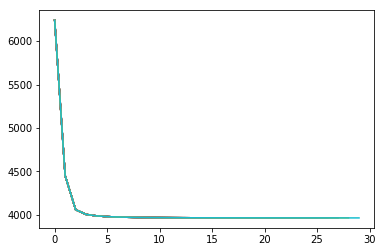

In [60]:

# Test training backprop algorithm
seed(1)
n_inputs = len(training_data[0]) - 1
n_outputs = len(set([row[-1] for row in training_data]))
network = initialize_network(n_inputs, 7, n_outputs)
train_network(network, training_data, 0.01, 30, n_outputs)
for layer in network:
    print(layer)

In [61]:
correct_count = 0
for row in test_data:
    prediction = predict(network, row)
    if prediction == row[-1]:
        correct_count += 1
    #print('Expected=%d, Got=%d' % (row[-1], prediction))
precision = (correct_count * 100) / len(test_data)
print("NN precision: {}".format(precision))
# EUROÄISCHE NAMEN DATENSATZ #########################################
#NN precision: 76.0841952458719 learning-rate: 0.01 hidden-units: 20
#NN precision: 78.02576664852114 learning-rate: 0.01 hidden-units: 6
#NN precision: 78.02576664852114 learning-rate: 0.01 hidden-units: 5
#NN precision: 78.02576664852114 learning-rate: 0.01 hidden-units: 4
#NN precision: 78.02576664852114 learning-rate: 0.01 hidden-units: 3
#NN precision: 78.02576664852114 learning-rate: 0.01 hidden-units: 2
#NN precision: 78.02576664852114 learning-rate: 0.01 hidden-units: 1
#NN precision: 76.0841952458719 learning-rate: 0.07 hidden-units: 6
#NN precision: 74.2152059517329 learning-rate: 0.7 hidden-units: 20
#NN precision: 74.2152059517329 learning-rate: 0.7 hidden-units: 5
#NN precision: 56.051533297042276 learning-rate 0.0001 hidden-units: 5

# BERLINER NAMEN DATENSATZ #########################################

NN precision: 78.02576664852114
